c:\Users\priba\Sean-2025\INC-LAB\CRAN-implementation\Server\utils\my_lora_utils.py
(40960,)
(40959,)
(40960,)
(40960,)
(40960,)
(40959,)
(40959,)
(40960,)
(40958,)
(40959,)
10
(40960,) complex64
(40959,) complex64
(40960,) complex64
(40960,) complex64
(40960,) complex64
(40959,) complex64
(40959,) complex64
(40960,) complex64
(40958,) complex64
(40959,) complex64


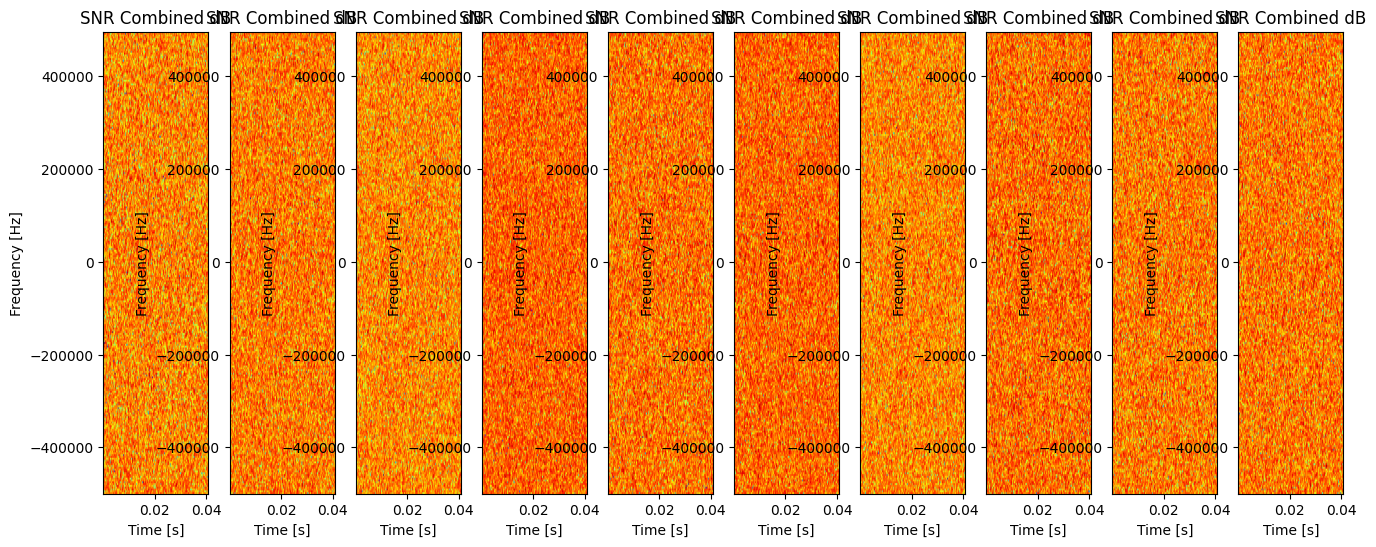

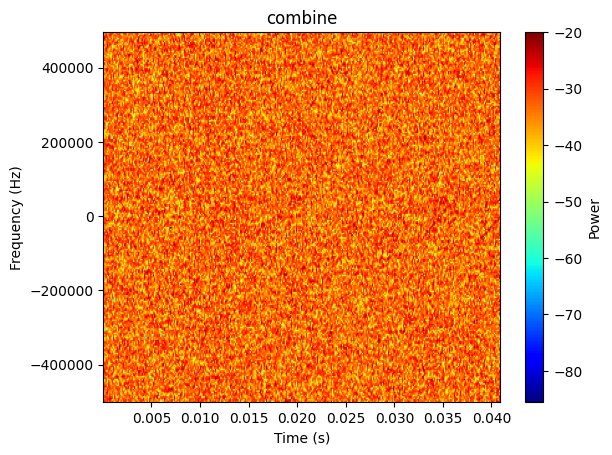

In [1]:
import numpy as np
from utils.LoRa import LoRa
import matplotlib.pyplot as plt
import importlib
import utils.my_lora_utils
importlib.reload(utils.my_lora_utils)
from utils.my_lora_utils import *
from pathlib import Path
print(utils.my_lora_utils.__file__)

folder_proc = Path("storage/result_proc")
folder_comb = Path("storage/result_combined")

signals = []
file_paths = []
combined = None

file_paths = sorted(folder_proc.glob("*.npy"))
for f in file_paths:
    with open(f, "rb") as fh:
        sig = np.load(fh)  # no mmap, file closes after with
        print(sig.shape)
        signals.append(sig)

file_paths2 = sorted(folder_comb.glob("*.npy"))
for f in file_paths2:
    with open(f, "rb") as fh:
        combined = np.load(fh)  # no mmap, file closes after with
    
len_a = len(signals)
print(len_a)
fig, axs = plt.subplots(nrows=1, ncols=len_a, figsize=(16, 6))  # 2 columns per row
k = 0
for sig in signals:
    print(sig.shape, sig.dtype)
    im2 = PLOT_SPECGRAM2(sig, 256, "SNR Combined dB", ax=axs[k])
    k = k + 1
plt.show()
PLOT_SPECGRAM(combined,256,"combine",128,1_000_000)

Upper freq max value : 2422.37027671766
Lower freq max value : 1873.5963248175149
Combine freq max value : 4295.966601535175
Estimate symbol: 100
arg max___ : 4045


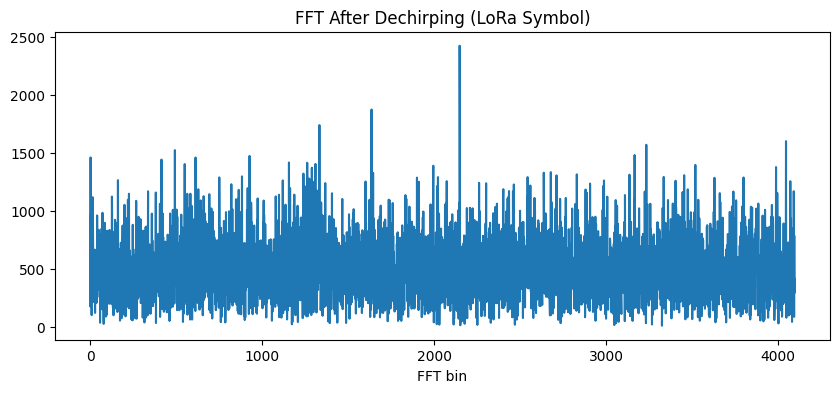

Upper freq max value : 2645.7374602323102
Lower freq max value : 1631.5116384379498
Combine freq max value : 3913.2451781183017
Estimate symbol: 100
arg max___ : 4045


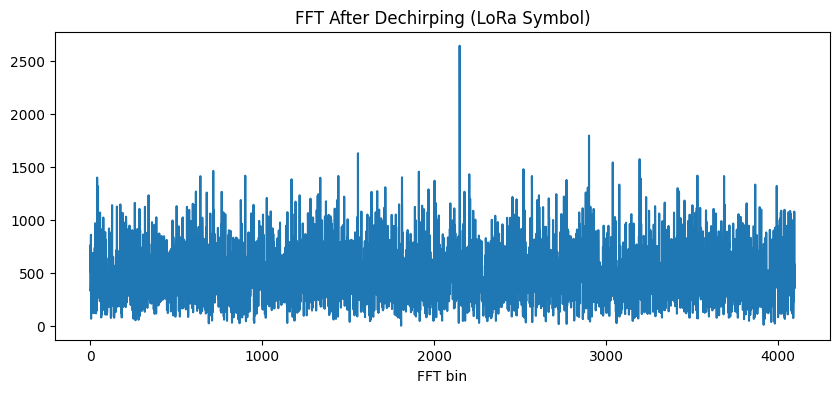

40960
40959
Upper freq max value : 1778.3014066312212
Lower freq max value : 2418.494854839794
Combine freq max value : 3667.729627087001
Estimate symbol: 375
arg max_ : 4045


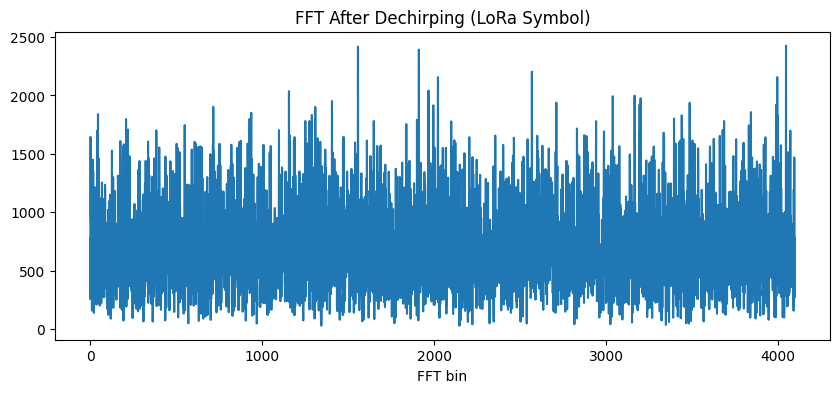

In [18]:
sf = 9
bw = 125000
fs = 1000000
symbol_ = 0
lora_init = LoRa(sf, bw)
down_chirp = lora_init.gen_symbol_fs( 0, down=True, Fs=fs)
shift = 4096 * 5
i = 0
for sig in signals:
    signal_a = sig[0+shift:4096+shift]
    dechirped_a = signal_a * down_chirp
    if i < 2:
        sym,max___=estimate_symbol_custom(signal_a,"abc",sf,fs,bw)
        print("Estimate symbol:",sym)
        print("arg max___ :", max_)
        fft_plot(dechirped_a)
    i = i + 1

len_A = len(signals[0])
len_B = len(signals[1])
print(len_A)
print(len_B)
target_len = max(int(len_A), int(len_B))

# new_signal_pad = np.pad(signals[0] , (0, target_len - len_A), mode="constant")
# old_signal_pad = np.pad(signals[1], (0, target_len - len_B), mode="constant")
new_signal_pad = signals[0][0:40959]
old_signal_pad = signals[1][0:40959]
combined = new_signal_pad + old_signal_pad
signal_com = combined[0+shift:4096+shift]
sym,max_=estimate_symbol_custom(signal_com,"com",sf,fs,bw)
print("Estimate symbol:",sym)
print("arg max_ :", max_)
signal_com = signal_com * down_chirp
fft_plot(signal_com)
## sequence = [0,256,0,256,100,100,1,2,3,256]


Upper freq max value : 3175.510195629419
Lower freq max value : 1582.3023556877233
Combine freq max value : 4649.932076169864
123
Upper freq max value : 3474.309221077145
Lower freq max value : 1425.474850983719
Combine freq max value : 4315.080905071118
123


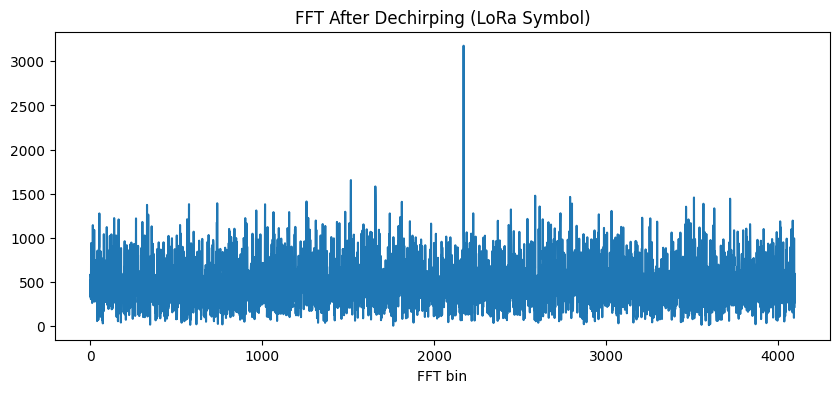

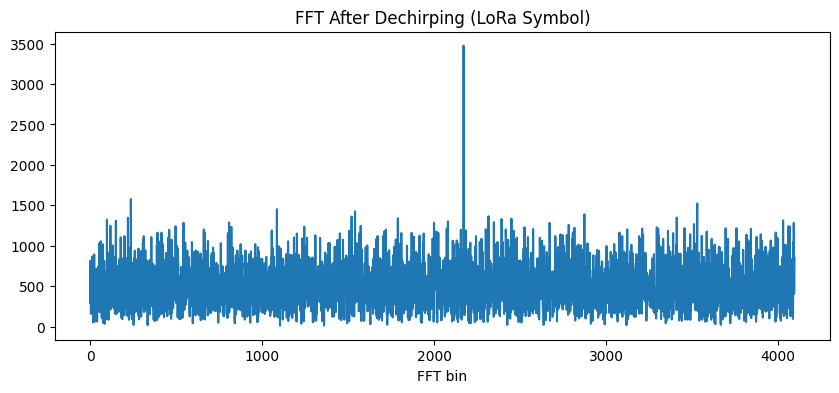

Upper freq max value : 6649.324643409112
Lower freq max value : 2314.833316632689
Combine freq max value : 8964.1579600418
123


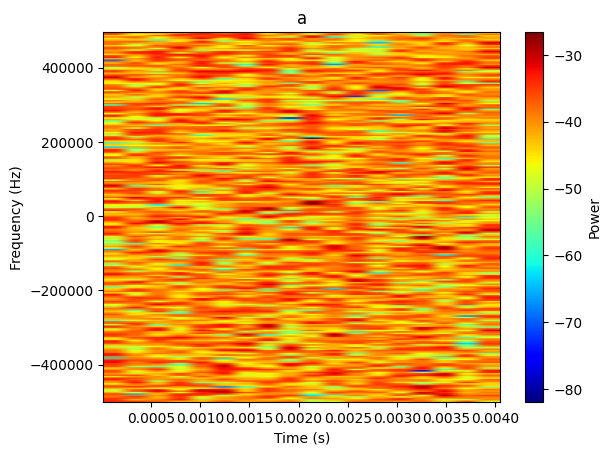

In [ ]:
lora_init = LoRa(9,125000)
down = lora_init.gen_symbol_fs(0,True,1000000)
a=lora_init.gen_symbol_fs(123,False,1000000)
b= lora_init.awgn_iq_with_seed(a,-19,0)
b2 = awgn(a, -19)
sym,max_ =estimate_symbol_custom(b,"estimate",9,1000000,125000)
print(sym)
sym,max_ =estimate_symbol_custom(b2,"estimate",9,1000000,125000)
print(sym)
fft_plot(b*down)
fft_plot(b2*down)

c = b + b2
sym,max_ =estimate_symbol_custom(c,"estimate",9,1000000,125000)
print(sym)
fft_plot(c*down)
PLOT_SPECGRAM(c,256,"a",32,1000000)

In [4]:
from scipy.optimize import curve_fit
import numpy as np

# Sample Points (e.g., noisy data for a parabola)
x_data = np.array([-3.72,-2.69,-1.28,-0.31,0,0.31,1.28,2.69,3.72])
y_data = np.array([0.5,0.375,0.25,0.125,0,-0.125,-0.25,-0.375,-0.5]) # y ~ x^2 with noise

# Define the function you want to fit (e.g., a quadratic)
def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c

# Use curve_fit to find optimal parameters (a, b, c)
params, covariance = curve_fit(quadratic_func, x_data, y_data)

print(f"Fitted Parameters: a={params[0]}, b={params[1]}, c={params[2]}")
# Output might be: Fitted Parameters: a=1.02, b=-0.11, c=0.07
# So, the function is approximately f(x) = 1.02x^2 - 0.11

def quadratic_function(x,a = -3.22e-09,b = -0.1415,c = 7.6681e-09):
    return a * x**2 + b * x + c

print(quadratic_function(0.31))

print(quadratic_function(-2.76))
print(quadratic_function(0.212))
print(quadratic_function(3.72))

Fitted Parameters: a=-3.2228653079613423e-09, b=-0.14150118196391848, c=7.668116808190462e-09
-0.04386499264134199
0.39053998313942795
-0.02999799247661968
-0.5263800368915479


In [5]:
from scipy.interpolate import CubicSpline


x_data = np.array([-3.72,-2.69,-1.28,-0.31,0,0.31,1.28,2.69,3.72], dtype=float)
y_data = np.array([ 0.5, 0.375,0.25, 0.125,0,-0.125,-0.25,-0.375,-0.5], dtype=float)

# Exact interpolation through all points
cs = CubicSpline(x_data, y_data, bc_type="natural")  # "natural" is usually stable

def f(x):
    return cs(x)

# Example:
print(f(-1.23))

0.2477693117754467


In [6]:
a = lora_init.gen_symbol_fs(0,False,1000000)
a_low = lora_init.awgn_iq_with_seed(a,-19,2)

